BLIP
====

**BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation**

* Paper: https://arxiv.org/abs/2201.12086

```bash
pip install torch torchvision
pip install transformers
pip install matplotlib
pip install supervision
```

### Models

 * `BlipForConditionalGeneration`
 * `BlipForQuestionAnswering`
 * `BlipForImageTextRetrieval`

### Captioning

In [1]:
from PIL import Image
import torch
from transformers import BlipProcessor
from transformers import BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-large"
)
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-large"
)

device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)
model = model.to(device)

/home/pyml/anaconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_path = "../samples/bicycle.jpg"

image = Image.open(image_path).convert("RGB")
image = image.resize((image.width // 4, image.height // 4))

text = "a photography of"
inputs = processor(image, text, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model.generate(**inputs)
print(outputs)

caption = processor.decode(outputs[0], skip_special_tokens=True)
print(caption)

tensor([[30522,  1037,  5855,  1997,  1037, 10165,  9083,  2114,  1037,  2630,
          2341,   102]], device='cuda:0')
a photography of a bicycle parked against a blue door


### Question Answering

In [3]:
from transformers import BlipProcessor
from transformers import BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained(
    "Salesforce/blip-vqa-base"
)
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base"
)
model.to(device);

In [4]:
image_path = "../samples/fruits-01.jpg"

image = Image.open(image_path).convert("RGB")
image = image.resize((image.width // 4, image.height // 4))

questions = [
    "what fruits and vegetables are in the picture?",
    "how many cucumbers are in the picture?",
    "how many strawberies are in the picture?",
    "how many blueberries are in the picture?",
    "how many raspberries are in the picture?",
]

answers = {}
for question in questions:
    inputs = processor(
        image, question, return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model.generate(**inputs)
    answer = processor.decode(
        outputs[0], skip_special_tokens=True
    )
    answers[question] = answer

print(answers)

{'what fruits and vegetables are in the picture?': 'cucumber blueberries raspberries', 'how many cucumbers are in the picture?': '2', 'how many strawberies are in the picture?': '0', 'how many blueberries are in the picture?': '12', 'how many raspberries are in the picture?': '4'}


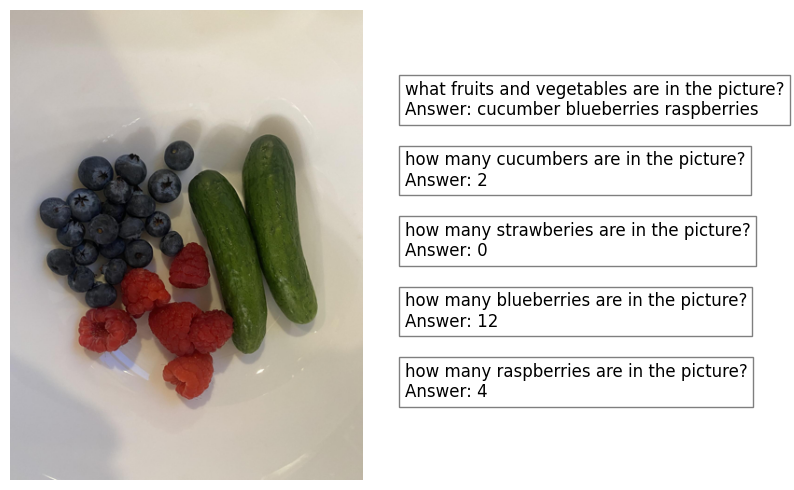

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(9, 5))

axes[0].imshow(image)
axes[0].axis('off')
axes[1].axis('off')

text_y = 0.85
for question, answer in answers.items():
    axes[1].text(
        0.05, text_y, f"{question}\nAnswer: {answer}",
        fontsize=12, verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.5)
    )
    text_y -= 0.15

plt.tight_layout()
plt.show()